In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r'IPL.csv')

In [3]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [4]:
df.columns

Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner',
       'toss_decision', 'first_ings_score', 'first_ings_wkts',
       'second_ings_score', 'second_ings_wkts', 'match_winner', 'won_by',
       'margin', 'player_of_the_match', 'top_scorer', 'highscore',
       'best_bowling', 'best_bowling_figure'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [6]:
df.describe()

,match_id,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,margin,highscore
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,37.500000,171.121622,6.135135,158.540541,6.175676,16.972973,71.716216
std,21.505813,29.048355,2.222699,29.299207,2.639832,19.651047,20.705052
min,1.000000,68.000000,0.000000,72.000000,1.000000,2.000000,28.000000
25%,19.250000,154.250000,5.000000,142.750000,4.000000,5.250000,57.000000
50%,37.500000,169.500000,6.000000,160.000000,6.000000,8.000000,68.000000
75%,55.750000,192.750000,8.000000,176.000000,8.000000,18.000000,87.750000
max,74.000000,222.000000,10.000000,211.000000,10.000000,91.000000,140.000000


In [7]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

**Most matches by which team**

In [8]:
match_wins = df['match_winner'].value_counts()

In [9]:
match_wins

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Punjab        7
Delhi         7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

Text(0.5, 1.0, 'most match win by the teams')

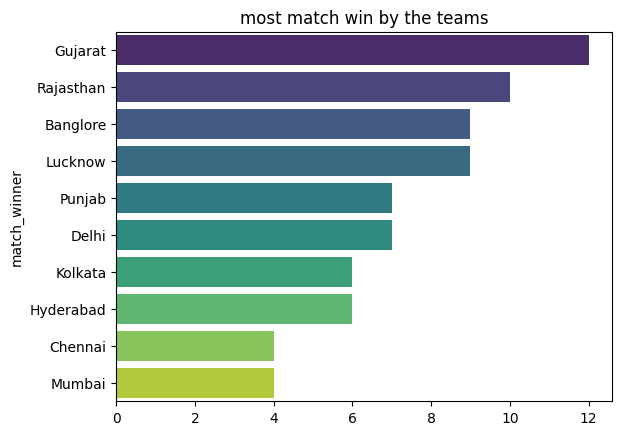

In [10]:
sns.barplot(y=match_wins.index,x=match_wins.values,palette='viridis')
plt.title("most match win by the teams")

**Toss Desicion Trends**

<Axes: xlabel='toss_decision', ylabel='count'>

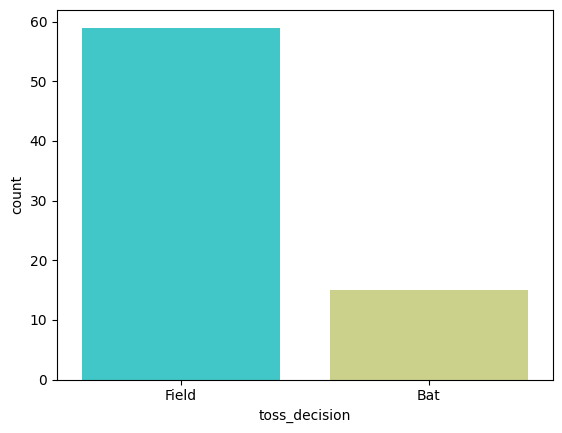

In [11]:
df['toss_decision']
sns.countplot(x=df['toss_decision'],palette='rainbow')

In [12]:
#percentage of the teams who win both toss and match
count = df[df['toss_winner']==df['match_winner']]['match_id'].count()
percentageOfWinning = (count * 100)/df.shape[0]
percentageOfWinning.round(2)

np.float64(48.65)

**How the team wins ? (run or wicket)**

<Axes: xlabel='won_by', ylabel='count'>

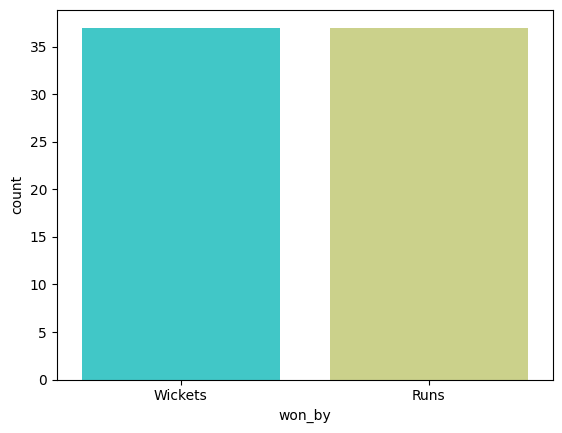

In [13]:
sns.countplot(x=df['won_by'],palette='rainbow')

**Most player of the match**

<Axes: ylabel='player_of_the_match'>

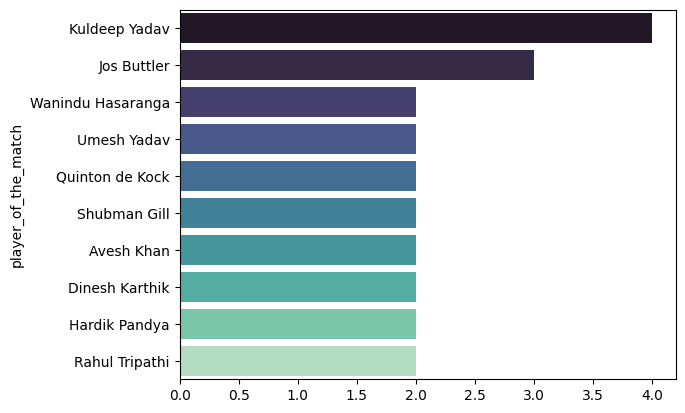

In [14]:
#who is the most player of the matches
count = df['player_of_the_match'].value_counts().head(10)
count
sns.barplot(x=count.values , y = count.index,palette='mako')

<Axes: xlabel='top_scorer'>

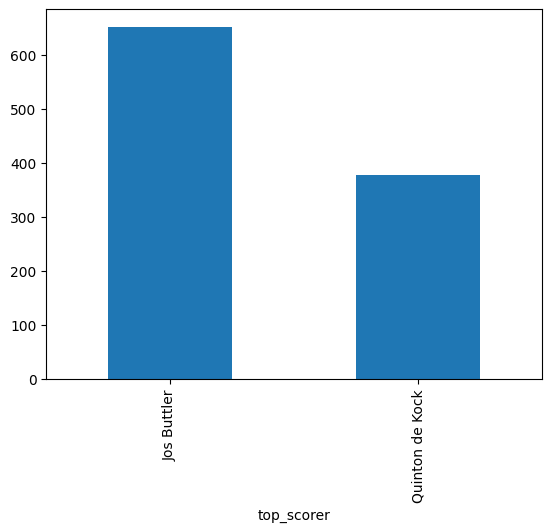

In [15]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)
high.plot(kind='bar')

In [20]:
#top 10 bowlers
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x: x.split('--')[0])
df['highest_wickets'] = df['highest_wickets'].astype(int)

<Axes: ylabel='best_bowling'>

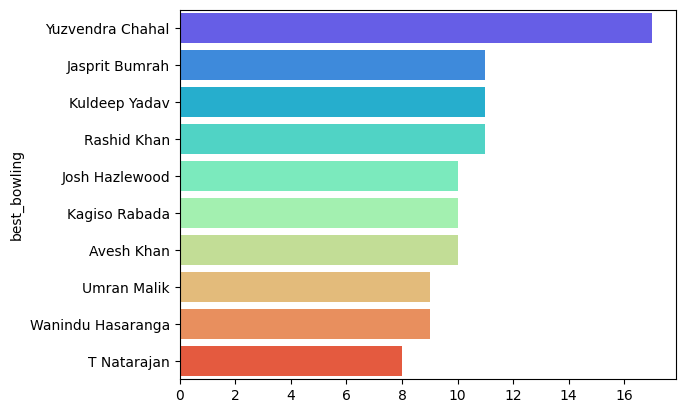

In [28]:
best_bowler = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=best_bowler.values,y=best_bowler.index,palette='rainbow')

<Axes: ylabel='venue'>

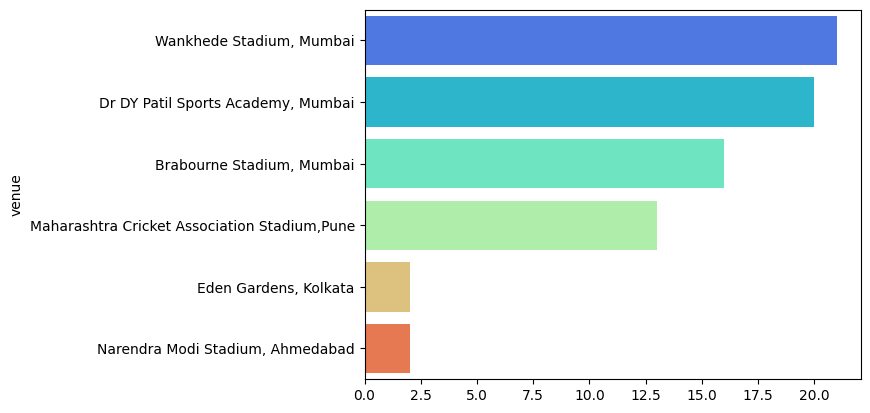

In [38]:
#most matches played by values
df.head()
venue = df['venue'].value_counts()
sns.barplot(x=venue.values,y=venue.index,palette='rainbow')

In [46]:
#who won the highest matches by runs 
df[df['won_by']=='Runs'].sort_values(by = 'margin',ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91


In [56]:
#which player has the highest score in a single match 
df[df['highscore']==df['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


In [57]:
#best bowling figures 
df[df['highest_wickets']==df['highest_wickets'].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
